In [1]:
import numpy as np
import mplstereonet as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from plots import *

%matplotlib inline

In [2]:
kynematic_window = 30 #degrees
slope_dipdir, slope_dip = 220,60

In [3]:
mu_dir, sigma_dir = 240,7
mu_dip,sigma_dip = 40,5
data1 = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, litho=['Quartzite', 'Itabirite'],size=100)
data1['structure'] = 'Sb'

mu_dir, sigma_dir = 200,5
mu_dip,sigma_dip = 55,5
data2 = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, litho=['Quartzite', 'Itabirite'],size=50)
data2['structure'] = 'Fr1'

mu_dir, sigma_dir = 300,10
mu_dip,sigma_dip = 80,2
data3 = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, litho=['Quartzite', 'Itabirite'],size=50)
data3['structure'] = 'Fr2'

df = pd.concat([data1,data2,data3],ignore_index=True)
df

,dipdir,dip,litho,structure
0,222,31,Quartzite,Sb
1,240,41,Itabirite,Sb
2,238,44,Quartzite,Sb
3,236,35,Itabirite,Sb
4,248,44,Quartzite,Sb
...,...,...,...,...
195,290,82,Itabirite,Fr2
196,296,83,Quartzite,Fr2
197,290,74,Itabirite,Fr2
198,271,79,Quartzite,Fr2


In [4]:
def multi_structure_stereogram(dataframe,web=False):
    '''Requires: column names to be: dipdir, dip'''
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(projection='stereonet')
    ax.density_contourf(dataframe.dipdir-90, dataframe.dip, measurement='poles', cmap='Reds')
    i=0
    for structure in dataframe.structure.unique():

        df = dataframe.query('structure == @structure')
        dipdir, dip = df.dipdir, df.dip
        mode_dipdir = mode(dipdir).mode
        mode_dip = mode(dip).mode

        ax.pole(dipdir-90, dip, c='k',markersize=1.5)
        ax.plane(mode_dipdir-90, mode_dip, c='k')
        
        plt.text(1.2,1.2+i,'Structure: {}\nPoints: {}\nMean Plane: {}/{}'.format(structure,dipdir.shape[0],int(mode_dipdir),int(mode_dip)), 
    horizontalalignment='right',
    verticalalignment='top',wrap=True,
    transform = ax.transAxes)
        i+=0.15
    ax.grid()


    if web:
       return fig
    else:
       plt.show()

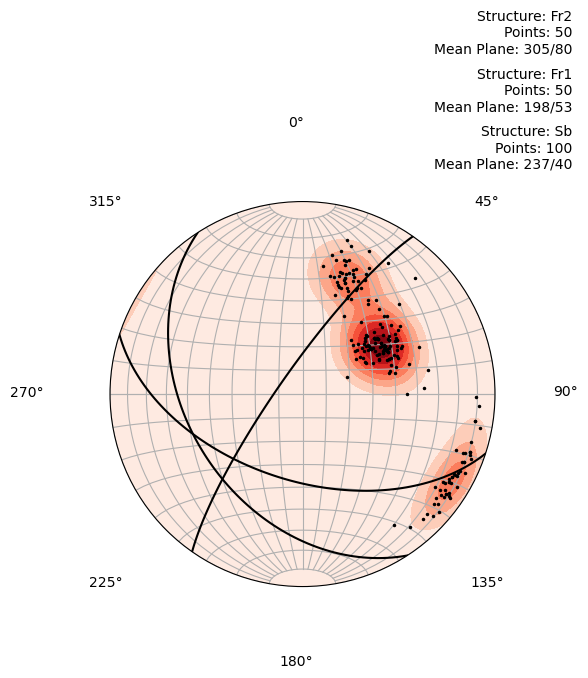

In [5]:
multi_structure_stereogram(df)

In [6]:
friction =  {'Itabirite': 37, 'Slate':28, 'Schist':30,'Quartzite':35}
df['friction'] = df['litho'].map(friction)

df

,dipdir,dip,litho,structure,friction
0,222,31,Quartzite,Sb,35
1,240,41,Itabirite,Sb,37
2,238,44,Quartzite,Sb,35
3,236,35,Itabirite,Sb,37
4,248,44,Quartzite,Sb,35
...,...,...,...,...,...
195,290,82,Itabirite,Fr2,37
196,296,83,Quartzite,Fr2,35
197,290,74,Itabirite,Fr2,37
198,271,79,Quartzite,Fr2,35


In [7]:
sb = df.query('structure == "Sb"')
fr = df.query('structure != "Sb"')
fr

,dipdir,dip,litho,structure,friction
100,205,46,Quartzite,Fr1,35
101,209,57,Itabirite,Fr1,37
102,201,52,Quartzite,Fr1,35
103,199,63,Itabirite,Fr1,37
104,197,54,Quartzite,Fr1,35
...,...,...,...,...,...
195,290,82,Itabirite,Fr2,37
196,296,83,Quartzite,Fr2,35
197,290,74,Itabirite,Fr2,37
198,271,79,Quartzite,Fr2,35


In [8]:
def get_intersection_dataframe(df, main_structure='Sb'):

    sb = df.query('structure == @main_structure')
    fr = df.query('structure != @main_structure')

    df_intersection = pd.DataFrame(columns=['planes','dipdir1',	'dip1',	'dipdir2',	'dip2',	'weak_friction'])
    
    dipdir1,dip1,dipdir2,dip2,weak_friction,planes = [],[],[],[],[],[]
    for i, (d1,p1,f1,s1) in enumerate(zip(sb.dipdir,sb.dip, sb.friction, sb.structure)):
        
        for x, (d2,p2,f2,s2) in enumerate(zip(fr.dipdir,fr.dip, fr.friction, fr.structure)):
            if f1<=f2:
                weak_friction.append(f1)
            elif f1>f2:
                weak_friction.append(f2)

            dipdir1.append(d1)
            dip1.append(p1)
            dipdir2.append(d2)
            dip2.append(p2)
            planes.append(f'{s1}/{s2}')

    df_intersection['dipdir1'] = dipdir1
    df_intersection['dip1'] = dip1
    df_intersection['dipdir2'] = dipdir2
    df_intersection['dip2'] = dip2
    df_intersection['weak_friction'] = weak_friction
    df_intersection['planes']= planes

    return df_intersection 

In [9]:
df_intersection = get_intersection_dataframe(df, main_structure='Sb')
df_intersection

,planes,dipdir1,dip1,dipdir2,dip2,weak_friction
0,Sb/Fr1,222,31,205,46,35
1,Sb/Fr1,222,31,209,57,35
2,Sb/Fr1,222,31,201,52,35
3,Sb/Fr1,222,31,199,63,35
4,Sb/Fr1,222,31,197,54,35
...,...,...,...,...,...,...
9995,Sb/Fr2,270,45,290,82,37
9996,Sb/Fr2,270,45,296,83,35
9997,Sb/Fr2,270,45,290,74,37
9998,Sb/Fr2,270,45,271,79,35


In [10]:
def calculate_intersection(df_intersection):
  # Calculate intersections
  bearing_intersect=[]
  plunge_intersect=[]
  for i, (d1,d2,p1,p2) in enumerate(zip(df_intersection.dipdir1,df_intersection.dipdir2,df_intersection.dip1,df_intersection.dip2, )):
    strike_1 = d1 - 90
    strike_2 = d2 - 90
    plunge, bearing = mpl.plane_intersection(strike_1, p1,strike_2, p2)
    plunge = np.round(plunge,2)
    bearing = np.round(bearing,2)
    bearing_intersect.append(bearing)
    plunge_intersect.append(plunge)
  # #Concatena o array de arrays em um só array
  bearing_intersect = np.concatenate(bearing_intersect)
  plunge_intersect = np.concatenate(plunge_intersect)

  return bearing_intersect, plunge_intersect

In [11]:
bearing_intersect, plunge_intersect = calculate_intersection(df_intersection)

df_intersection['bearing_intersect'] = bearing_intersect
df_intersection['plunge_intersect'] = plunge_intersect
df_intersection

,planes,dipdir1,dip1,dipdir2,dip2,weak_friction,bearing_intersect,plunge_intersect
0,Sb/Fr1,222,31,205,46,35,274.14,20.24
1,Sb/Fr1,222,31,209,57,35,290.94,12.18
2,Sb/Fr1,222,31,201,52,35,274.33,20.16
3,Sb/Fr1,222,31,199,63,35,279.54,17.87
4,Sb/Fr1,222,31,197,54,35,270.02,21.89
...,...,...,...,...,...,...,...,...
9995,Sb/Fr2,270,45,290,82,37,203.17,21.48
9996,Sb/Fr2,270,45,296,83,35,209.46,26.19
9997,Sb/Fr2,270,45,290,74,37,207.65,24.89
9998,Sb/Fr2,270,45,271,79,35,181.24,1.24


In [12]:
df_intersection['wedge_paralellism'] = df_intersection.apply(lambda x: paralellism(x['bearing_intersect'], slope_dipdir), axis=1)
df_intersection['plunge_paralellism'] = df_intersection.apply(lambda x: dip_paralellism(x['plunge_intersect'], slope_dip,x['weak_friction']), axis=1)

In [13]:
def wedge_rupture(wedge_paralellism, dip_paralellism):
    if wedge_paralellism and dip_paralellism:
        return True
    else:
        return False
df_intersection['wedge_rupture'] = df_intersection.apply(lambda x: planar_rupture(x['wedge_paralellism'], x['plunge_paralellism']), axis=1)

In [14]:
friction_circle = np.arange(0,360,1)
friction_mean = df_intersection['weak_friction'].mean()
friction_mean_array = np.array([int(friction_mean)]* len(friction_circle))


In [15]:
def wedge_stereogram(dataframe,slope_dipdir, slope_dip,web=False):
    '''Requires: column names to be: dipdir, dip'''
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(projection='stereonet')
    
    ax.plane(slope_dipdir-(90-60),90, c='g')
    ax.plane(slope_dipdir-(90+60),90, c='g')
    ax.plane(slope_dipdir-270,90-slope_dip, c='brown')
    ax.pole(friction_circle-90, friction_mean_array, c='brown', markersize=1)
    i=0

    ax.density_contourf(dataframe.bearing_intersect-90, dataframe.plunge_intersect, measurement='poles', cmap='Blues')

    ax.pole(dataframe.bearing_intersect-90, dataframe.plunge_intersect, c='k',
            markersize=1.5)

        
    plt.text(1.2,1.3,'Planos instaveis: {}\nTotal: {}\nTalude - {}/{}\nAtrito médio: {}'.format(dataframe.wedge_rupture.sum(),len(dataframe.wedge_rupture),slope_dipdir, slope_dip,friction_mean), 
    horizontalalignment='right',
    verticalalignment='top',wrap=True,
    transform = ax.transAxes)
    ax.grid()


    if web:
       return fig
    else:
       plt.show()

In [16]:
samples = np.random.randint(0,df_intersection.shape[0],1000)

In [17]:
df_intersection.loc[samples]

,planes,dipdir1,dip1,dipdir2,dip2,weak_friction,bearing_intersect,plunge_intersect,wedge_paralellism,plunge_paralellism,wedge_rupture
1022,Sb/Fr1,243,46,198,45,35,218.09,43.20,True,True,True
9653,Sb/Fr2,234,43,304,81,35,222.32,42.40,True,True,True
6702,Sb/Fr1,244,48,201,52,35,232.69,47.44,True,True,True
8135,Sb/Fr1,232,39,199,49,37,245.90,38.17,True,True,True
5098,Sb/Fr2,237,40,271,79,35,187.02,28.35,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5152,Sb/Fr2,236,34,301,78,35,218.88,32.81,True,False,False
4896,Sb/Fr2,230,45,296,83,35,212.73,43.68,True,True,True
5089,Sb/Fr2,237,40,301,78,35,220.87,38.87,True,True,True
9242,Sb/Fr1,254,48,224,73,35,300.48,37.41,False,True,False


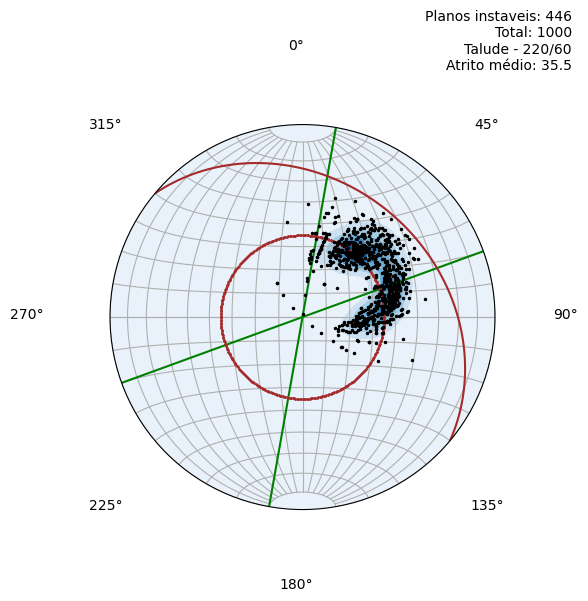

In [18]:
wedge_stereogram(df_intersection.loc[samples],slope_dipdir, slope_dip)